# Commuted Piano Synthesis Experiment

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/Users/briancruz/repos/research/music_299_2025sp/.venv/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=100
  warnings.warn(


['golden-skillet']

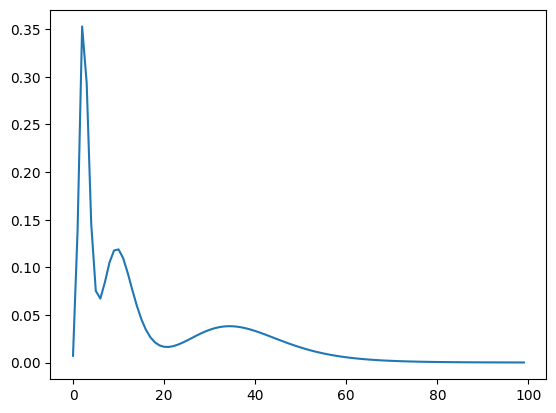

In [2]:
from commuted_piano import calculate_strike
from audio_utils import mfcc_hash

s = calculate_strike(
    100,
    [
        [
            -1,
            10,
        ],
        [-1.1, 2.5],
        [-1.15, 0],
    ],
)
import matplotlib.pyplot as plt

plt.plot(s)
mfcc_hash(s)

{'channel': 'L',
 'freq': 246.94165062806206,
 'hammer_delay_ms': 10.0,
 'ir_params': {'dry_wet_balance': 1.0,
               'fade_in_seconds': 0.0,
               'fade_out_seconds': 1.0,
               'length_seconds': 0.5668934240362812,
               'start_seconds': 0.0,
               'url': 'https://oramics.github.io/sampled/IR/EMT140-Plate/samples/emt_140_dark_1.wav'},
 'sample_rate': 44100,
 'strike_num_samples': 100,
 'strike_params_list': [{'left': -1.0, 'right': 10.0},
                        {'left': -1.1, 'right': 2.5},
                        {'left': -1.15, 'right': 0.0}],
 'strings': [{'ap_denom': [7.0, 1.0, 6.0],
              'feedback_gain': 0.995,
              'freq_ratio': 1.0,
              'gain': 0.5,
              'lpf_params': {'freq': 17000.0, 'q': 0.5}},
             {'ap_denom': [7.0, 1.0, 6.0],
              'feedback_gain': 0.99,
              'freq_ratio': 0.9999,
              'gain': 0.2,
              'lpf_params': {'freq': 17000.0, 'q': 0.5}},
 

/Users/briancruz/repos/research/music_299_2025sp/audio_utils.py:23: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _sr, plate = wavfile.read(download_url(url))


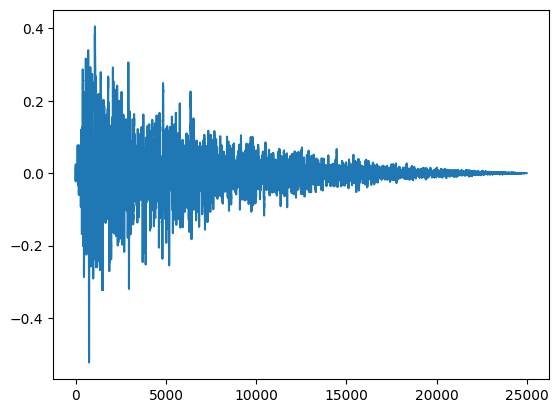

/Users/briancruz/repos/research/music_299_2025sp/.venv/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=44
  warnings.warn(


plate len 25000
['horizontal-margarine']
white_noise ['balanced-shiraz', 'broad-community', 'linear-mask']
white_noise


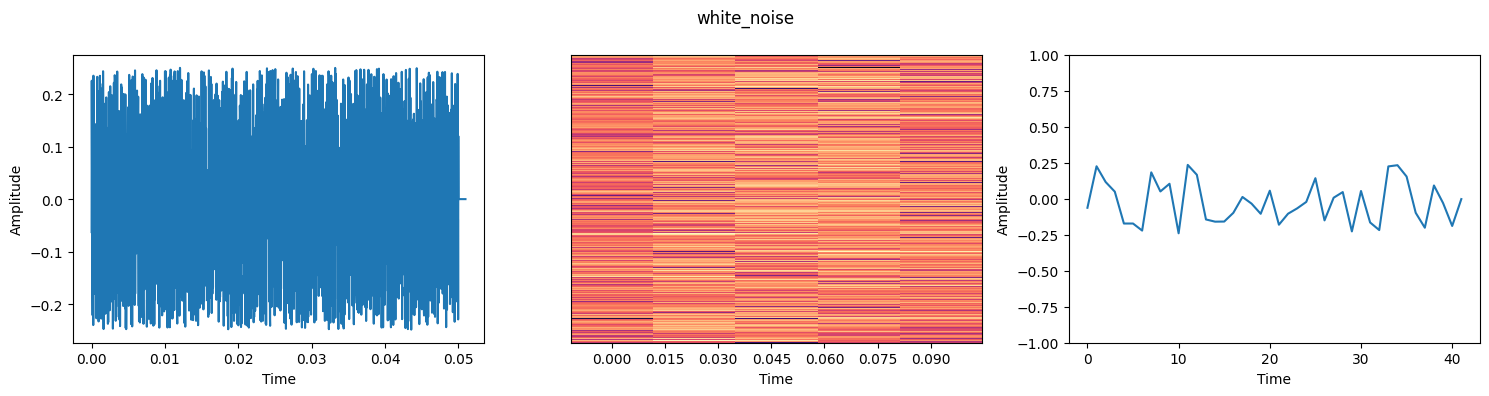

many filters ['watery-pressure', 'ambitious-photon', 'greasy-page']
many filters


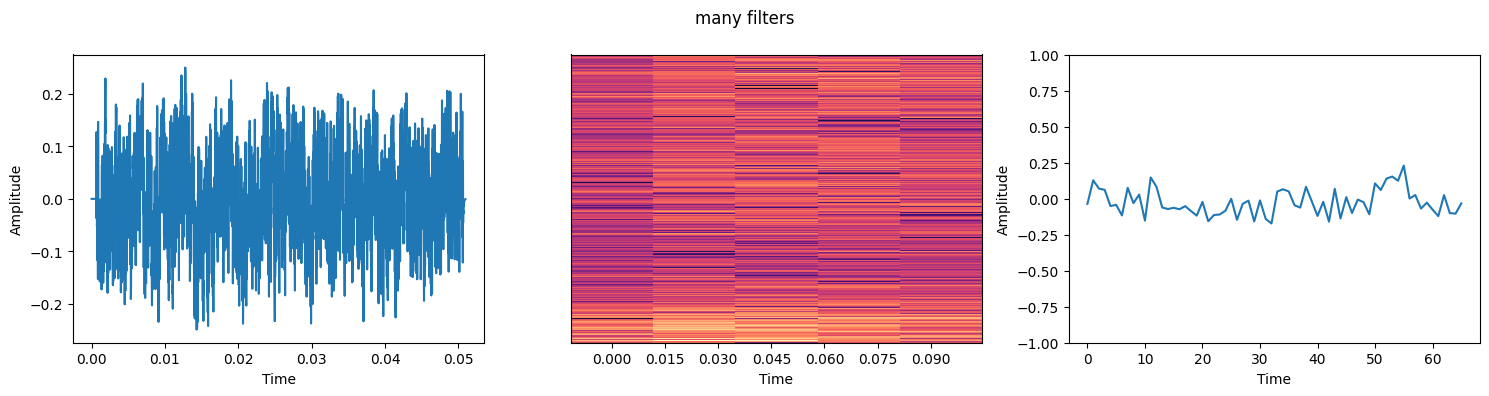

strike ['vibrato-patio', 'mashed-book', 'bipartite-sump']
strike


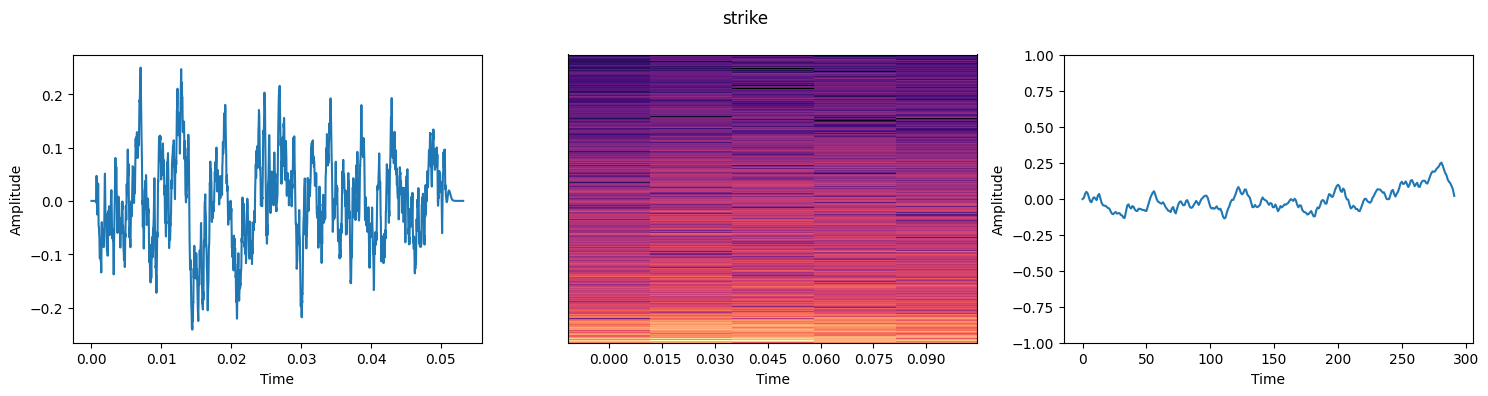

27346 2347
plate ['naive-line', 'descriptive-parameter', 'scared-contract']
plate


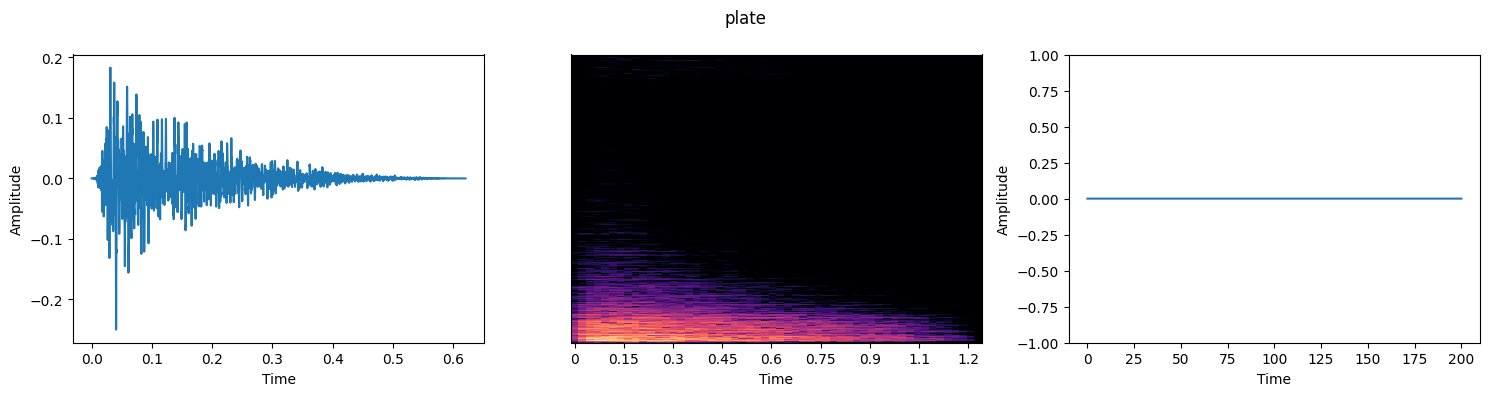

(array([0.52806561, 1.05613121, 0.52806561]), array([1.        , 0.90672491, 0.20553751]))
string ['upbeat-corona', 'frosty-draft', 'smoky-golf']
string


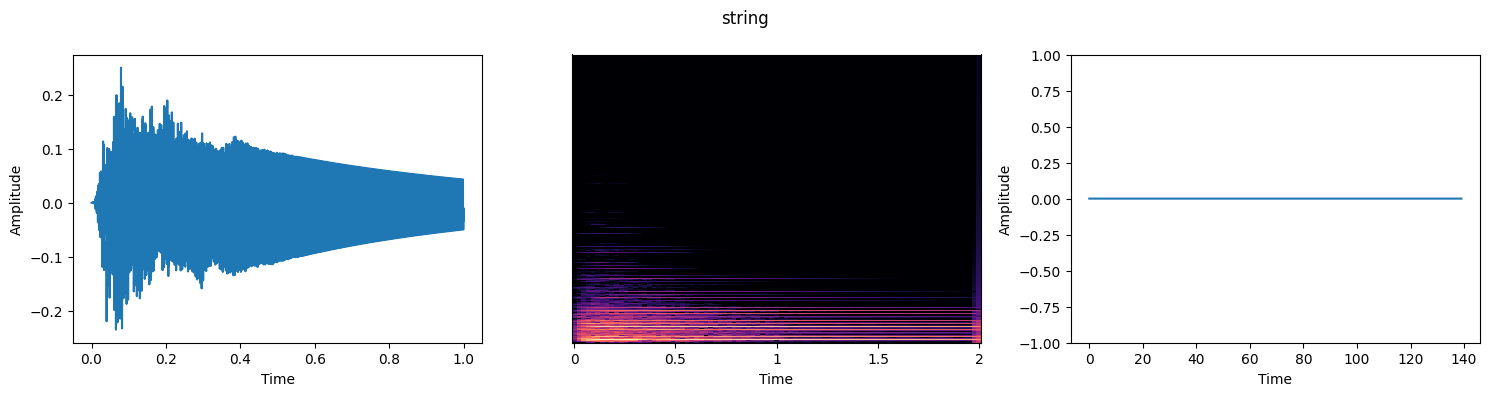

final ['upbeat-corona', 'frosty-draft', 'smoky-golf']
final


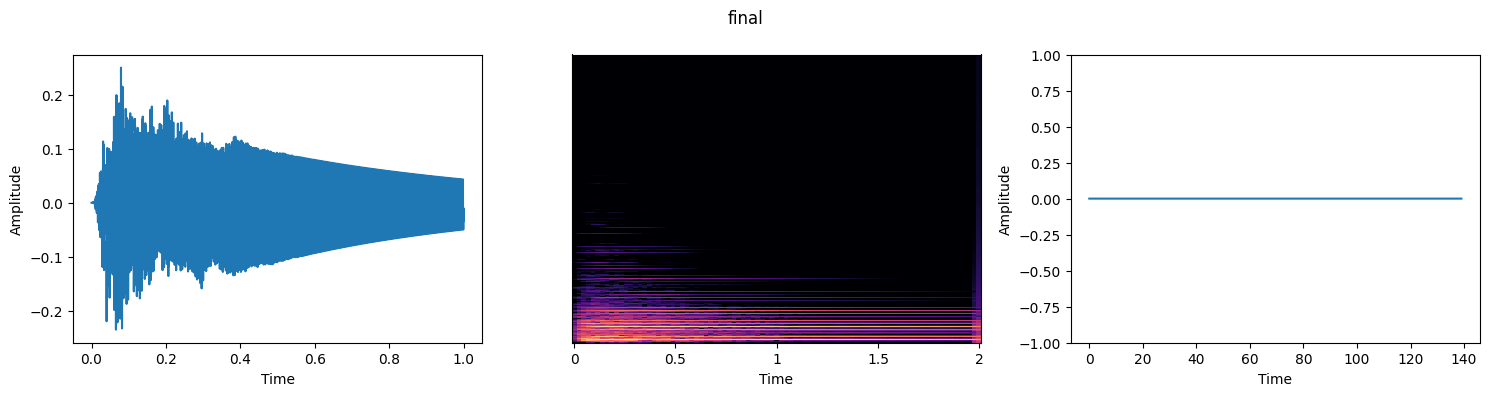

array([ 0.01101439,  0.01250019,  0.01332723, ..., -0.00940124,
       -0.00948532, -0.00951106])

In [3]:
from commuted_piano import CommutedPianoParams, params_to_piano_note, mtof
from audio_utils import play_audio
import pprint


note_params = CommutedPianoParams.model_validate(
    {
        # "ap_denom": [7, 1, 6],
        "channel": "L",
        "freq": mtof(59),
        "hammer_delay_ms": 10.0,
        # "ir_dry_wet": 1.0,
        # "lpf_params": {"freq": 17000, "q": 0.2},
        "sample_rate": 44100,
        "strike_num_samples": 100,
        "strike_params_list": [
            {"left": -1, "right": 10},
            {"left": -1.1, "right": 2.5},
            {"left": -1.15, "right": 0},
        ],
        "strings": [
            {
                "ap_denom": (ap_denom := [7.0, 1.0, 6.0]),
                "feedback_gain": 0.995,
                "freq_ratio": 1.0,
                "gain": 0.5,
                "lpf_params": {"freq": 17000.0, "q": 0.5},
            },
            {
                "ap_denom": ap_denom,
                "feedback_gain": 0.99,
                "freq_ratio": 0.9999,
                "gain": 0.2,
                "lpf_params": {"freq": 17000.0, "q": 0.5},
            },
            {
                "ap_denom": ap_denom,
                "feedback_gain": 0.999,
                "freq_ratio": 10.0,
                "gain": 0.1,
                "lpf_params": {"freq": 17000.0, "q": 0.5},
            },
        ],
        "ir_params": {
            "start_seconds": 0.000,
            "length_seconds": 25000.0 / 44100,
            "fade_in_seconds": 0.000,
            "fade_out_seconds": 1.0,
            "url": "https://oramics.github.io/sampled/IR/EMT140-Plate/samples/emt_140_dark_1.wav",
            "dry_wet_balance": 1.0,
        },
    }
)

pprint.pprint(note_params.model_dump())
note_params.to_piano_note(show_graphs=True)
